In [1]:
import numpy as np #to read the file
import pandas as pd #for numerical computations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('G:\Data-Science-Portfolio\Diabetes Prediction\diabetes.csv')

In [3]:
#shape of Dataset
dataset.shape

(768, 9)

In [4]:
#prints first 5 rows
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#gives Summary of the Data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Gives feature names, type, entry counts, feature count, memory usage etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#lets see if there are any more columns with missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5,1,u'Correlation between features')

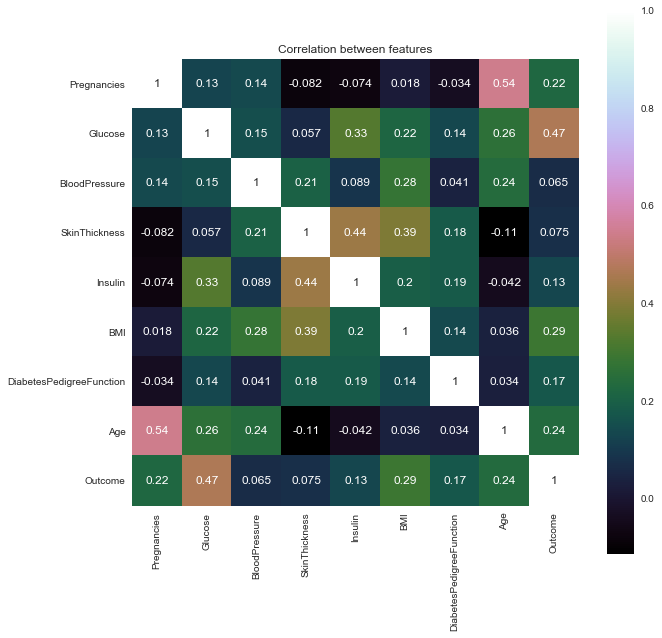

In [8]:
sns.set(font_scale=1)
corr=dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')

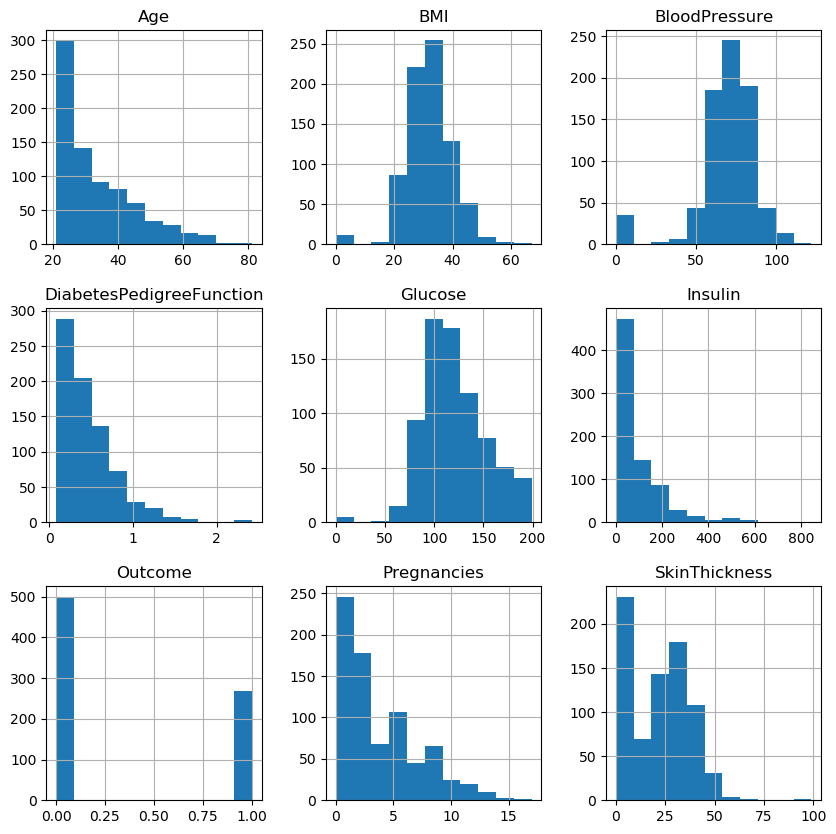

In [9]:
plt.style.use(style = 'default')
dataset.hist(bins=11,figsize=(10,10),grid=True)
plt.show()

In [10]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:,8].values


In [11]:
#splitting the dataset into training set and test set
#Splitting 75%:25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state
= 0)
#Applying feature scaling to the dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
from sklearn.metrics import accuracy_score

In [12]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as dt
classifier = dt(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
#Predicting the results
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Decision Tree Classifier"
print"Accuracy Score for Decision Tree Classifier:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for Decision Tree Classifier\n",cm

Accuracy Score and Confusion Matrix for Decision Tree Classifier
Accuracy Score for Decision Tree Classifier: 0.7604166666666666
Confusion Matrix for Decision Tree Classifier
[[103  27]
 [ 19  43]]


In [13]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier as rfc
#for 5 Trees in forest
classifier=rfc(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
#Predicting the results
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Random Forest Classifier"
print"Accuracy Score for Random Forest Classifier:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for Random Forest Classifier\n",cm

Accuracy Score and Confusion Matrix for Random Forest Classifier
Accuracy Score for Random Forest Classifier: 0.7447916666666666
Confusion Matrix for Random Forest Classifier
[[109  21]
 [ 28  34]]


In [14]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
#Predicting the test results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Naive Bayes"
print"Accuracy Score for Naive Bayes:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for Naive Bayes\n",cm


Accuracy Score and Confusion Matrix for Naive Bayes
Accuracy Score for Naive Bayes: 0.7395833333333334
Confusion Matrix for Naive Bayes
[[107  23]
 [ 27  35]]


In [15]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)
#Predicting the results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Support Vector Machines"
print"Accuracy Score for SVM:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for SVM\n",cm

Accuracy Score and Confusion Matrix for Support Vector Machines
Accuracy Score for SVM: 0.8072916666666666
Confusion Matrix for SVM
[[117  13]
 [ 24  38]]


In [16]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train, y_train)
#Predicting the results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for KNearest Neighbors"
print"Accuracy Score for KNN:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for KNN\n",cm

Accuracy Score and Confusion Matrix for KNearest Neighbors
Accuracy Score for KNN: 0.796875
Confusion Matrix for KNN
[[113  17]
 [ 22  40]]


In [17]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)
#Predicting the test result
y_pred = classifier.predict(X_test)
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Logistic Regression"
print"Accuracy Score for Logistic Regression:",accuracy_score(y_test, y_pred)
print"Confusion Matrix for Logistic Regression\n",cm

Accuracy Score and Confusion Matrix for Logistic Regression
Accuracy Score for Logistic Regression: 0.7916666666666666
Confusion Matrix for Logistic Regression
[[115  15]
 [ 25  37]]


#Comparing different Machine Learning models and cross validating them.

LR: 0.769515 (0.048411)
KNN: 0.726555 (0.061821)
CART: 0.687423 (0.059675)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)
RFC: 0.751265 (0.064937)


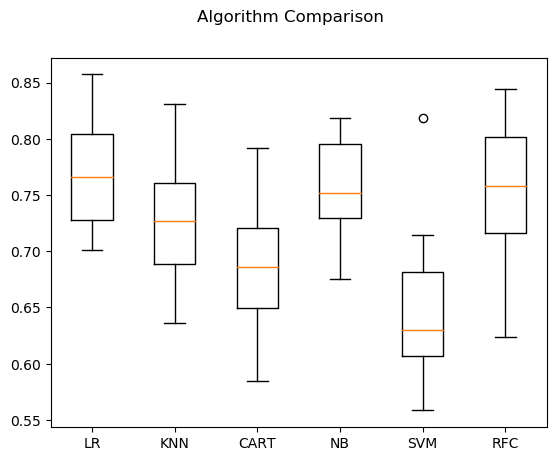

In [18]:
#Comparing different Machine Learning models and cross validating them
print"#Comparing different Machine Learning models and cross validating them.\n"
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

array = dataset.values
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:,8].values
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, 
                                                 scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()